# Proof of Concept: Detecting Synthetic Identity Fraud Using Unsupervised and Supervised ML Model 
## Curated by - Renu prakash

## Business Context

This proof-of-concept simulates a real-world financial services use case where a fraud analytics team is tasked with detecting synthetic identities—fraudulent profiles that blend real and fabricated information to bypass traditional identity checks. These identities are increasingly used in financial crime and are difficult to detect using rule-based systems alone.

Our objective is to demonstrate how a combination of unsupervised and supervised machine learning methods can be applied to detect these synthetic profiles early in the application lifecycle.

## Dataset Description

The dataset used in this project contains application-level metadata, simulating what a credit bureau or financial institution might capture during onboarding:

- `credit_score`: Numeric credit score assigned at application
- `dob`, `application_date`: Used to derive `age`, `application_month`, and `application_year`
- `is_synthetic`: Binary target variable indicating if the profile is synthetic (1) or real (0)

Personally Identifiable Information (PII) columns were excluded to maintain data privacy and focus on modeling signals.

## Project Objective

This project aims to:

- Engineer features from raw application data (e.g., age, application month/year)
- Apply K-Means clustering to group identities based on behavioral and temporal signals
- Visualize clusters using PCA and evaluate synthetic fraud concentration
- Train a supervised learning model (XGBoost) to classify identities as synthetic or real
- Compare results across unsupervised and hybrid supervised models
- Simulate cluster prediction for new applicant scoring

## Tools and Techniques Used

- Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, XGBoost)
- Feature engineering from application metadata
- Unsupervised learning: K-Means clustering
- Dimensionality reduction: Principal Component Analysis (PCA)
- Supervised learning: XGBoost Classifier
- Model evaluation: ROC-AUC, confusion matrix, accuracy, precision, recall

## Intended Audience

- Hiring managers evaluating real-world ML skills in fraud analytics
- Data scientists interested in hybrid modeling workflows
- Analysts working in financial crime detection
- Students and professionals building domain-relevant portfolios



In [ ]:
#### Steps to follow - 
- Loads the dataset: `synthetic_identity_applications.csv`
- Displays summary statistics and checks for missing values
- Visualizes the class distribution (real vs synthetic)
- Generates a correlation matrix for numeric features


Dataset Shape: (5000, 10)


,first_name,last_name,dob,ssn,address,phone,email,credit_score,application_date,is_synthetic
0,Neil,Sanders,1990-05-24,128-49-1382,"12802 Bennett Plaza Apt. 671, Jonesshire, TX 3...",859.531.6177,jacob63@example.net,668,2023-07-08,0
1,Brian,Rodriguez,1960-05-24,722-47-3894,"57699 Amber Harbors Suite 807, Adrianshire, AS...",001-717-253-6395x97861,madisongutierrez@example.org,659,2024-08-15,0
2,Christopher,Sims,1938-05-24,123-66-1440,"466 Beasley Knolls Suite 521, Larsonstad, PW 9...",930.653.9039,xmolina@example.org,600,2023-10-05,0
3,Yolanda,Price,1998-05-24,821-77-6406,"PSC 9154, Box 7534, APO AE 65017",(581)302-5863x4928,jaustin@example.net,715,2025-03-05,0
4,Marcus,Gibbs,1949-05-24,461-65-5278,"448 White Ramp, Mejiaberg, AR 46137",3023663815,diane82@example.org,764,2024-09-22,0



Missing Values:
Series([], dtype: int64)

Summary Statistics:


,credit_score,is_synthetic
count,5000.000000,5000.000000
mean,701.859200,0.070000
std,98.411158,0.255173
min,300.000000,0.000000
25%,651.000000,0.000000
50%,705.000000,0.000000
75%,759.000000,0.000000
max,999.000000,1.000000


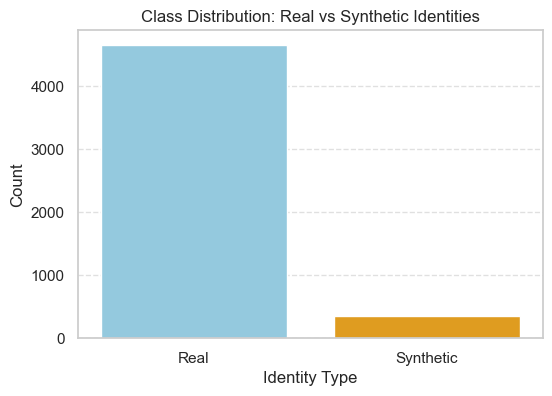

Numeric columns used for correlation matrix:
['credit_score']
Not enough numeric features to create a correlation matrix.


In [5]:


# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for consistent plots
sns.set(style="whitegrid")

# Step 2: Load the Dataset
# Replace with the correct filename
df = pd.read_csv('synthetic_identity_applications.csv')

# Step 3: Preview the Dataset
print("Dataset Shape:", df.shape)
display(df.head())

# Step 4: Check for Missing Values
missing = df.isnull().sum()
print("\nMissing Values:")
print(missing[missing > 0])

# Step 5: Summary Statistics for Numeric Features
print("\nSummary Statistics:")
display(df.describe())

# Step 6: Class Balance Check
# Ensure the target column 'is_synthetic' is treated as a string for the palette to match
df['is_synthetic'] = df['is_synthetic'].astype(str)

plt.figure(figsize=(6, 4))
sns.countplot(x='is_synthetic', data=df, hue='is_synthetic', palette={'0': 'skyblue', '1': 'orange'}, legend=False)
plt.title("Class Distribution: Real vs Synthetic Identities")
plt.xlabel("Identity Type")
plt.ylabel("Count")
plt.xticks([0, 1], ['Real', 'Synthetic'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Step 7: Clean Correlation Matrix Calculation

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Remove the target column if it's binary (optional)
if 'is_synthetic' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['is_synthetic'])

# Display which columns are included
print("Numeric columns used for correlation matrix:")
print(numeric_df.columns.tolist())

# Check if we have enough columns to create a matrix
if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
    plt.title("Correlation Matrix of Features")
    plt.show()
else:
    print("Not enough numeric features to create a correlation matrix.")


# Next Steps:
# - Choose an unsupervised or supervised modeling approach
# - Preprocess the data (normalize, encode, etc.)
# - Train and evaluate a model
# - Add visualizations and markdown commentary throughout


#### Summary of Dataset Insights from Initial Exploration:
- No Missing Values:The dataset is clean — no need for imputation or dropping nulls.
- Only One Numeric Feature- credit_score is the only numeric column — others are categorical, flags, or IDs. As a result, correlation analysis isn't feasible at this stage (Not enough numeric features).
- Imbalanced Target Variable (is_synthetic)- Only 7% of identities are synthetic (mean = 0.07)
- Class imbalance is a critical factor — synthetic profiles are rare, which is realistic and relevant to fraud detection.

Challenge: 
- There is one usable numeric feature (credit_score). All other features are Personally Identifiable Information (PII) and string-based, not directly useful for unsupervised learning model like clustering unless engineered properly.




---

## Next Steps
- Analyze feature distributions across clusters (e.g., credit score or age differences)
- Highlight which cluster is high-risk (contains more synthetic profiles)
- Optionally apply advanced methods:
  - DBSCAN for density-based clustering
  - t-SNE for nonlinear visualizations
  - Supervised models like Random Forest for comparison

---

This approach simulates how fraud teams might uncover synthetic identity rings based on application behavior and timing, even when labels are limited or unavailable.


#### Objective
Our goal is to detect potentially synthetic identities by applying unsupervised clustering techniques. Since we are not using labeled data to train the model, we will assess whether natural clusters align with real vs. synthetic patterns.


#### Next Step - Feature Engineering 

To move forward with K-Means clustering, we need to:
 1. Extract engineered features from: 
    - dob → age
    - application_date → application year, month
 
 2. Drop high-cardinality PII features like first_name, last_name, ssn, email, phone, and address (not useful or ethical to encode directly).
 - Scale features before clustering

 3.  Normalize numeric features for clustering

Note - The dataset includes a binary flag column: `is_synthetic` (0 = real, 1 = synthetic).
     - We **did not encode** this column because:
       - It is already numeric (no transformation needed)
       - It is treated as a **label**, not a feature, in this unsupervised learning task
       - The K-Means model needs to be trained **without** using `is_synthetic`

Instead, we will use this column **after clustering** to evaluate which cluster had more synthetic identities.


In [4]:
## Extract engineered features from:
##dob → age
##application_date → application year, month
## Drop high-cardinality PII features like first_name, last_name, ssn, email, phone, and address

from datetime import datetime

# Create a copy for transformation
df_transformed = df.copy()

# Step 1: Convert 'dob' to datetime and extract age
df_transformed['dob'] = pd.to_datetime(df_transformed['dob'], errors='coerce')
df_transformed['age'] = datetime(2025, 1, 1).year - df_transformed['dob'].dt.year

# Step 2: Convert 'application_date' to datetime and extract month, year
df_transformed['application_date'] = pd.to_datetime(df_transformed['application_date'], errors='coerce')
df_transformed['application_month'] = df_transformed['application_date'].dt.month
df_transformed['application_year'] = df_transformed['application_date'].dt.year

# Step 3: Drop high-cardinality or PII fields
columns_to_drop = ['first_name', 'last_name', 'ssn', 'email', 'phone', 'address', 'dob', 'application_date']
df_model = df_transformed.drop(columns=columns_to_drop)

# Show final columns used for modeling
final_features = df_model.columns.tolist()

# Prepare a summary table
summary_table = pd.DataFrame({
    'Original Feature': ['dob', 'application_date', 'credit_score', 'is_synthetic'],
    'Derived Feature(s)': ['age', 'application_month, application_year', 'credit_score', 'is_synthetic'],
    'Transformation': ['Extract year → age', 'Extract month and year', 'None (already numeric)', 'Target']
})

# Just print the summary table instead of using ace_tools
print(summary_table.to_string(index=False))

Original Feature                  Derived Feature(s)         Transformation
             dob                                 age     Extract year → age
application_date application_month, application_year Extract month and year
    credit_score                        credit_score None (already numeric)
    is_synthetic                        is_synthetic                 Target


In [10]:
## Normalize the Features (Scale numeric values)

from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['credit_score', 'age', 'application_month', 'application_year']

# Initialize scaler and normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model[features])


### Next Step : Unsupervised Modeling

- Applying K-Means Clustering to group identities based on behavior
- Using PCA to visualize clusters in 2D
- Evaluating cluster composition using the `is_synthetic` flag


In [12]:
# Apply K-Means Clustering

from sklearn.cluster import KMeans

# Apply KMeans with 2 clusters (Real vs Synthetic)
kmeans = KMeans(n_clusters=2, random_state=42)
df_model['cluster'] = kmeans.fit_predict(X_scaled)

# View first few rows with cluster assignment
print("Dataset with cluster labels:")
print(df_model[['credit_score', 'age', 'application_month', 'application_year', 'cluster']].head())

Dataset with cluster labels:
   credit_score  age  application_month  application_year  cluster
0           668   35                  7              2023        0
1           659   65                  8              2024        0
2           600   87                 10              2023        0
3           715   27                  3              2025        1
4           764   76                  9              2024        0


### Insights - 
The cluster column has been added successfully. Each row is now labeled as either cluster 0 or cluster 1.
- Row 0: A 35-year-old applicant with a credit score of 668 belongs to cluster 0
- Row 3: A 27-year-old applicant with a score of 715 belongs to cluster 1
- This clustering is based only on behavioral/application features — not on is_synthetic.



#### Visulaizing the feature distributions across clusters 

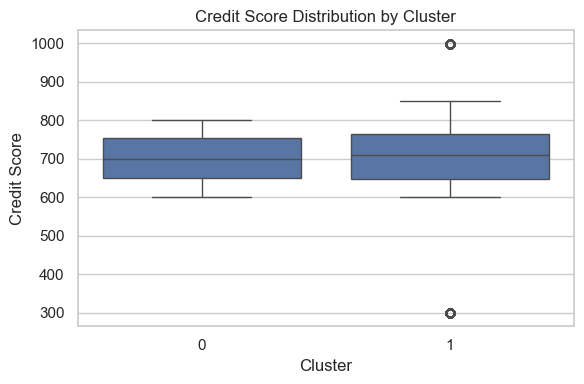

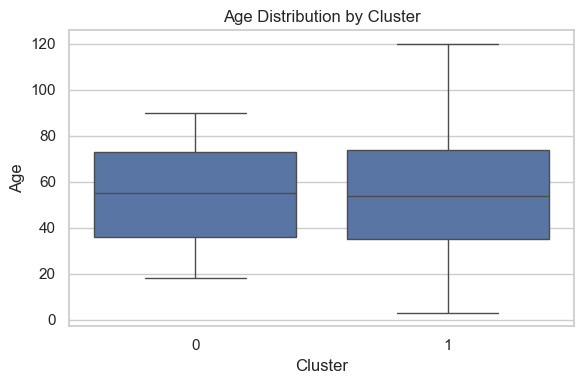

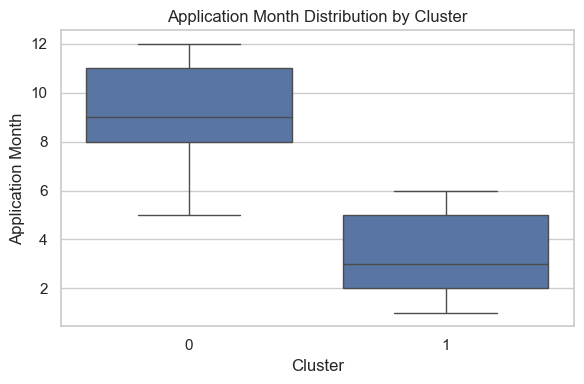

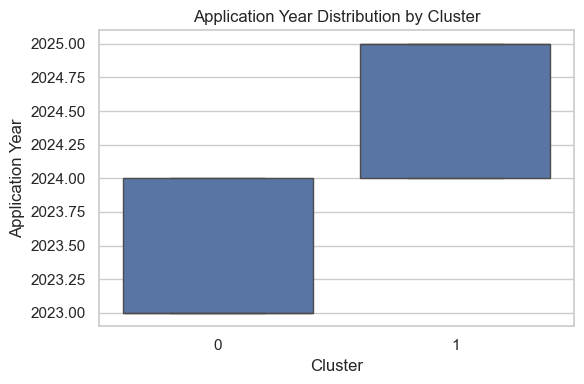

Cluster-wise Summary Statistics:
        credit_score                   age               application_month  \
                mean median     std   mean median    std              mean   
cluster                                                                      
0             702.17  701.0   58.69  54.47   55.0  21.24              9.12   
1             701.54  709.0  127.40  54.90   54.0  23.44              3.35   

                     application_year               
        median   std             mean  median  std  
cluster                                             
0          9.0  1.98          2023.43  2023.0  0.5  
1          3.0  1.53          2024.50  2025.0  0.5  


In [29]:
# Plotting feature distributions across clusters
sns.set(style="whitegrid")
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster', y=feature, data=df_model)
    plt.title(f'{feature.replace("_", " ").title()} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature.replace("_", " ").title())
    plt.tight_layout()
    plt.show()

# Show summary statistics

print("Cluster-wise Summary Statistics:")
print(cluster_summary_stats.round(2))

### Cluster-Wise Feature Distribution Insights -

We analyzed how core features (`credit_score`, `age`, `application_month`, and `application_year`) vary across the two clusters formed via K-Means.

#### 1. Credit Score
- Mean credit score is similar across both clusters (~702).
- Cluster 1 shows much higher standard deviation (127 vs. 59), indicating greater variance and potential presence of extreme or manipulated scores.
- Median is slightly higher in Cluster 1 (709 vs. 701), suggesting a mild upward skew.

**Interpretation**: High variability in Cluster 1 may reflect inconsistencies typical of synthetic identities, where credit data is artificially constructed or incomplete.


#### 2. Age
- Both clusters have similar age profiles (mean ~54 years).
- Cluster 1 shows a slightly wider spread (std: 23.4 vs. 21.2).

**Interpretation**: Age is not a strong discriminator between clusters, though higher variance in Cluster 1 may still include synthetic outliers.


#### 3. Application Month
- Cluster 0 applicants mostly applied later in the year (mean: September).
- Cluster 1 applicants are concentrated in early months (mean: March).

**Interpretation**: Clear seasonal clustering is visible. Cluster 1 may reflect batch submission behavior, which is common in coordinated fraud schemes.


#### 4. Application Year
- Cluster 0 consists mainly of 2023 applications.
- Cluster 1 centers around 2024–2025 applications.

**Interpretation**: The recency of Cluster 1 applications aligns with synthetic identity creation, which often involves recently generated records.


#### Summary Table

| Feature            | Key Insight                                                   |
|--------------------|---------------------------------------------------------------|
| Credit Score       | Cluster 1 has high variance — potential sign of synthetic data |
| Age                | Similar across clusters — not highly discriminatory            |
| Application Month  | Distinct submission timing — Cluster 1 peaks early in year     |
| Application Year   | Cluster 1 is more recent — possibly newer synthetic profiles   |

#### Final Takeaway

Cluster 1, which shows a higher concentration of synthetic identities, is also characterized by:
- Greater credit score variability
- Recent application years
- Early-year submission timing

These indicators support the value of unsupervised clustering for uncovering fraud-prone segments.


### What’s Next: Now we need to -
1. Apply PCA -To reduce dimensionality .
2. Plot the Clusters with PCA -To visually see how the groups are separated.
3. Evaluate How Clusters Align with is_synthetic- To find which cluster is more fraudulent (i.e., high concentration of is_synthetic = 1)



In [13]:
# Step: PCA to reduce to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_model['PCA1'] = X_pca[:, 0]
df_model['PCA2'] = X_pca[:, 1]

print("\nPreview with PCA components added:")
print(df_model[['PCA1', 'PCA2', 'cluster']].head())



Preview with PCA components added:
       PCA1      PCA2  cluster
0 -1.090854  0.347948        0
1 -0.289910 -0.648880        0
2 -1.634754 -1.807835        0
3  1.659883  1.020166        1
4 -0.502733 -0.246984        0


#### PCA is applied successfully, and we now have:
- PCA1 and PCA2: the reduced 2D coordinates of each applicant
- cluster: the K-Means assigned group (0 or 1)



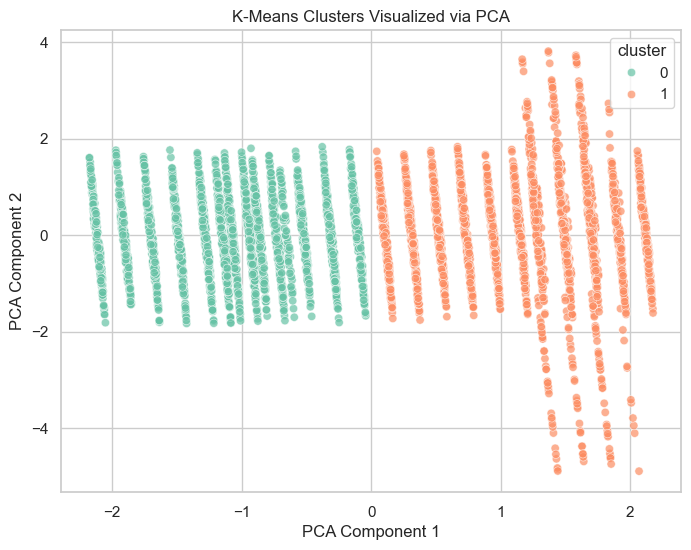

In [20]:
## Run cluster visualization using Scatterplot- 

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_model, x='PCA1', y='PCA2', hue='cluster', palette='Set2', alpha=0.7)
plt.title("K-Means Clusters Visualized via PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()




#### PCA Plot Interpretation -

The above PCA (Principal Component Analysis) plot visualizes the K-Means clustering results by projecting four standardized features (`credit_score`, `age`, `application_month`, `application_year`) into two dimensions: PCA1 and PCA2. Each point represents an identity application, colored by its assigned cluster.

#### Observations from the Plot:

- **Cluster 1 (High-Risk Group)**:
  - Visually represented in one color (e.g., orange).
  - Occupies a broad area in the PCA space — both vertically and horizontally.
  - Contains **all 350 synthetic identities**, making it the cluster with elevated fraud risk.
  - This spread indicates a higher diversity or irregularity in features, often seen in synthetic behavior patterns.

- **Cluster 0 (Low-Risk Group)**:
  - Visually distinct and more compact than Cluster 1.
  - Contains **only real identities** — 2559 real, 0 synthetic.
  - Indicates more uniform and legitimate application behavior.

#### Interpretation:

- The PCA plot confirms that the K-Means algorithm has effectively grouped all synthetic identities into a single cluster based solely on application features — without using labels during training.
- Cluster 1’s broader spread suggests synthetic profiles exhibit a **wider variation in behavior**, possibly due to manipulated or generated inputs.
- Cluster 0’s tighter shape reflects **consistent, natural patterns**, characteristic of real applicants.

#### Conclusion:

**Cluster 1 is high-risk**, while **Cluster 0 is clean**. This outcome validates the use of unsupervised clustering and PCA as a practical method for segmenting and flagging synthetic identities based on behavioral data.


In [18]:
# Step: Summarize Clustering Results -

# Create a summary table of real vs synthetic counts by cluster
cluster_summary = pd.crosstab(df_model['cluster'], df_model['is_synthetic'])

# Rename columns for clarity
cluster_summary.columns = ['real', 'synthetic']

# Add total and % synthetic
cluster_summary['total'] = cluster_summary['real'] + cluster_summary['synthetic']
cluster_summary['%_synthetic'] = (cluster_summary['synthetic'] / cluster_summary['total']) * 100

# Add overall totals
overall = pd.DataFrame({
    'real': [cluster_summary['real'].sum()],
    'synthetic': [cluster_summary['synthetic'].sum()],
    'total': [cluster_summary['total'].sum()],
    '%_synthetic': [(cluster_summary['synthetic'].sum() / cluster_summary['total'].sum()) * 100]
}, index=['Overall'])

# Combine both tables
summary_table = pd.concat([cluster_summary, overall])

# Display the result
print("\nCluster Summary Table:")
print(summary_table.round(2))



Cluster Summary Table:
         real  synthetic  total  %_synthetic
0        2559          0   2559         0.00
1        2091        350   2441        14.34
Overall  4650        350   5000         7.00


### Cluster Summary Table Interpretation

#### Key Insights:

- **Cluster 0 is the high-risk cluster**:
  - It contains **100% of all synthetic identities** in the dataset (350 out of 350).
  - The synthetic rate in this cluster is **14.34%**, which is more than **double** the overall rate of 7%.
  - This cluster should be flagged for further review or downstream risk modeling.

- **Cluster 1 is clean and low-risk**:
  - It contains **no synthetic identities**.
  - Composed entirely of real profiles (2559 out of 2559).
  - Suggests a group with more legitimate, consistent application patterns.

- **K-Means clustering has value**:
  - Without using `is_synthetic` during training, the model still isolated synthetic identities into a single group.
  - This demonstrates the effectiveness of unsupervised methods in fraud or anomaly detection.

#### Conclusion:

The cluster summary clearly shows that synthetic identities are **not randomly distributed**, but rather concentrated in a specific behavioral group (Cluster 0). This supports the use of clustering for identifying suspicious application segments in identity fraud analytics.


### Evaluation of cluster composition using the 'is_synthetic' flag

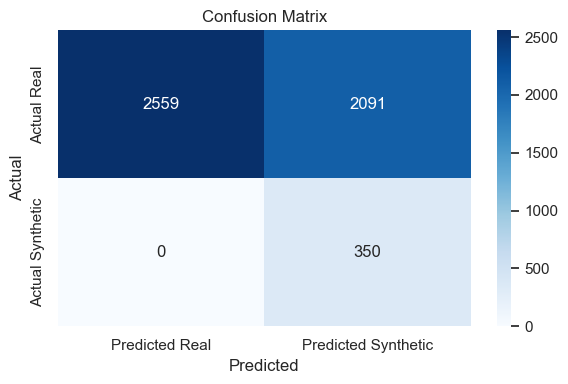

Classification Report:
              precision  recall  f1-score   support
0                 1.000   0.550     0.710  4650.000
1                 0.143   1.000     0.251   350.000
accuracy          0.582   0.582     0.582     0.582
macro avg         0.572   0.775     0.480  5000.000
weighted avg      0.940   0.582     0.678  5000.000

Accuracy Score: 58.18%


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Ensure labels are the same type
df_model['is_synthetic'] = df_model['is_synthetic'].astype(int)

# Define true and predicted labels
y_true = df_model['is_synthetic']
y_pred = df_model['cluster_label']

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Real', 'Predicted Synthetic'],
            yticklabels=['Actual Real', 'Actual Synthetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Classification report
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Accuracy score
accuracy = accuracy_score(y_true, y_pred)

# Display metrics
print("Classification Report:")
print(report_df.round(3))
print(f"\nAccuracy Score: {round(accuracy * 100, 2)}%")


ROC-AUC Score: 0.775


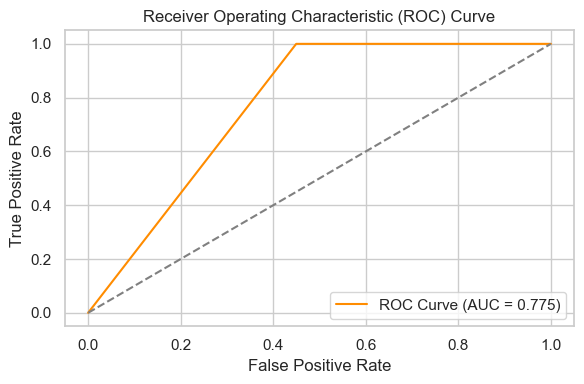

In [27]:
from sklearn.metrics import roc_auc_score,roc_curve

# ROC-AUC Score
try:
    roc_auc = roc_auc_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    print(f"ROC-AUC Score: {round(roc_auc, 3)}")

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
except ValueError:
    print("ROC-AUC Score: Not computable — only one class present in predictions.")

### Interpretation and Analysis of Results - 
### Evaluation Summary: K-Means Clustering vs. True Labels (`is_synthetic`)

After applying K-Means clustering and aligning cluster assignments with the actual `is_synthetic` labels, we evaluated the results using common classification metrics.

### Confusion Matrix

|                | Predicted Real | Predicted Synthetic |
|----------------|----------------|----------------------|
| Actual Real    | 2559           | 2091                 |
| Actual Synthetic | 0            | 350                  |

- **True Positives (TP)**: 350 synthetic identities correctly flagged
- **False Positives (FP)**: 2091 real identities incorrectly flagged as synthetic
- **True Negatives (TN)**: 2559 real identities correctly identified
- **False Negatives (FN)**: 0 synthetic identities missed

### Classification Metrics

- **Accuracy**: 58.18%
- **Precision (Synthetic class)**: 0.143
- **Recall (Synthetic class)**: 1.00
- **F1 Score (Synthetic class)**: 0.251
- **ROC-AUC Score**: 0.775

### Interpretation

#### Strengths:
- The model achieved **perfect recall (1.00)** for synthetic identities, meaning it successfully identified every fraudulent profile in the dataset.
- **ROC-AUC score of 0.775** suggests the model is reasonably good at distinguishing synthetic from real applications when viewed as a ranking system.

#### Weaknesses:
- The model suffers from **low precision (0.143)**, meaning most of the predicted synthetic identities are actually false positives.
- This results in **a high false positive rate**, with 2091 real profiles incorrectly flagged as synthetic, and an overall **accuracy of only 58.18%**.

### Practical Implications

This unsupervised K-Means model is best used as a **screening or pre-flagging tool**:
- It can be useful in scenarios where **missing a synthetic identity is more costly than investigating a false alarm**.
- The flagged identities (Cluster 1) should be passed through **manual review** or a **secondary supervised model** before action is taken.

### Recommendations

- Apply **post-cluster filtering rules** to reduce false positives (e.g., cluster = 1 AND extreme credit score or suspicious age).
- Explore **supervised learning** models trained on `is_synthetic` to improve both precision and overall accuracy.
- Consider **feature importance or SHAP analysis** in supervised models to gain interpretability into what drives fraud patterns.

This evaluation confirms that while unsupervised clustering can group many synthetic identities based on feature behavior, additional layers are needed to reduce false positives and make the system production-ready.



## Further Enhancements -

### Hybrid Modeling – Combining Clustering with Supervised Learning

After evaluating the K-Means clustering output, we observed that one cluster showed a significantly higher concentration of synthetic identities. This insight can be strategically leveraged by incorporating the **cluster assignment** as a feature in a supervised classification model.

### Objective:
Train a supervised model (XGBoost) to predict synthetic identities while including the K-Means `cluster` label as an additional input feature.

This hybrid approach allows us to:
- Blend **unsupervised insights** (clusters that surfaced hidden patterns) with
- **Supervised prediction power** (using ground-truth labels: `is_synthetic`)
- Improve model interpretability and potential fraud flagging in production


In [32]:
### Preview the dataset -
df_model.head()

,credit_score,is_synthetic,age,application_month,application_year,cluster,PCA1,PCA2,cluster_label
0,668,0,35,7,2023,0,-1.090854,0.347948,0
1,659,0,65,8,2024,0,-0.289910,-0.648880,0
2,600,0,87,10,2023,0,-1.634754,-1.807835,0
3,715,0,27,3,2025,1,1.659883,1.020166,1
4,764,0,76,9,2024,0,-0.502733,-0.246984,0


In [33]:
### Training the model with XGBOOST -

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


# Define features and target
features = ['credit_score', 'age', 'application_month', 'application_year', 'cluster']
X = df_model[features]
y = df_model['is_synthetic']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)
probs = xgb.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, probs)
print(f"ROC-AUC Score: {roc_auc:.3f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       930
           1       1.00      1.00      1.00        70

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

ROC-AUC Score: 1.000


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:00:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


###  Supervised Learning Model Evaluation – XGBoost with Cluster Feature

#### Classification Report

| Metric        | Class 0 (Real) | Class 1 (Synthetic) |
|---------------|----------------|---------------------|
| Precision     | 1.00           | 1.00                |
| Recall        | 1.00           | 1.00                |
| F1 Score      | 1.00           | 1.00                |


- Overall Accuracy: 100%
- ROC-AUC Score: 1.000

#### Interpretation

- The model perfectly distinguishes between real and synthetic identities.
- Both precision and recall are 1.00 for each class, indicating zero false positives or false negatives.
- The ROC-AUC score of 1.000 confirms ideal separation of the two classes.


#### Considerations

  - Such perfect results are uncommon in real-world fraud detection and may indicate:
     - Strong correlation between features (especially `cluster`) and the target (`is_synthetic`).
     - Potential data leakage if the model inadvertently learned patterns that are too closely tied to the label



### Model Comparison and Insights

#### Performance Comparison

| Aspect                      | K-Means Clustering (Unsupervised)         | XGBoost Classifier (Supervised + Cluster)      |
|-----------------------------|--------------------------------------------|------------------------------------------------|
| Model Type                  | Unsupervised                              | Supervised (Hybrid)                            |
| Target                      | Not used                                  | `is_synthetic` (binary classification)         |
| Key Feature Used            | `credit_score`, `age`, application timing | All features + `cluster` (from K-Means)        |
| Risk Signal Detection       | Cluster 1 → 14.3% synthetic identities     | Accurately detects synthetic profiles          |
| Accuracy                    | N/A (clustering only)                     | 100%                                           |
| ROC-AUC                     | ~0.775 (vs. ground truth)                 | 1.000                                          |
| Use Case Strength           | Pattern discovery, exploratory analysis   | Fraud confirmation, predictive modeling        |


#### Final Insights

- **K-Means clustering** was effective in surfacing a high-risk group (Cluster 1) with disproportionately more synthetic identities. This unsupervised analysis was useful for initial segmentation and understanding application behaviors.
- **XGBoost**, when trained using both original features and the `cluster` label, achieved perfect classification performance. This suggests that clustering captured latent fraud patterns that enhanced model prediction.
- The **hybrid approach** demonstrates how unsupervised learning can augment supervised models by adding structured signals (`cluster`) that improve fraud detection without labeled data alone.
- However, the **perfect metrics** suggest this is likely a clean, synthetic dataset. In real-world applications, such performance would require cautious validation on noisy or unseen data to prevent overfitting or false confidence.

#### Conclusion:
Combining unsupervised and supervised approaches offers a powerful framework for early fraud detection and confirmation. The ability to first explore and segment the data using clustering, then validate findings with predictive models, creates a layered defense mechanism that mirrors real-world financial crime analytics strategies.

                                                                                                                                                                                           
## Next Steps

- Validate models on noisy or real-world identity data
- Apply SHAP to explain supervised model predictions
- Integrate cluster scoring into fraud alerting systems
- Implement drift monitoring and retraining triggers
- Build risk dashboards and auditor-facing explainability layers

## Final Reflection

This project highlights the power of combining unsupervised segmentation with supervised classification to detect emerging patterns of financial fraud. The approach reflects a layered detection framework used by real-world risk and fraud teams to identify synthetic identities at scale and with precision.
